In [2]:
from bs4 import BeautifulSoup
import requests

In [4]:
#1. Write a python program to display all the header tags from ‘en.wikipedia.org/wiki/Main_Page’.
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://en.wikipedia.org/wiki/Main_Page')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h1 class="firstHeading" id="firstHeading">Main Page</h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featured_picture"></span><span class="mw-headline" id="Today's_featured_picture">Today's featured picture</span></h2>

<h2 class="mp-h2" id="mp-other"><span class="mw-headline" id="Other_areas_of_Wikipedia">Other areas of Wikipedia</span></h2>

<h2 class="mp-h2" id="mp-sister"><span id="Wikipedia.27s_sister_projects"></span><span class="mw-headline" id="Wiki

In [5]:
Title_list= []
for i in titles:
    Title_list.append(i.text.replace('\n',''))
Title_list

['Main Page',
 "From today's featured article",
 'Did you know\xa0...',
 'In the news',
 'On this day',
 "Today's featured picture",
 'Other areas of Wikipedia',
 "Wikipedia's sister projects",
 'Wikipedia languages',
 'Navigation menu',
 'Personal tools',
 'Namespaces',
 'Variants',
 'Views',
 'More',
 'Search',
 'Navigation',
 'Contribute',
 'Tools',
 'Print/export',
 'In other projects',
 'Languages']

2. Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. Name, IMDB rating, Year of 
release) and make data frame.

3. Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. Name, IMDB rating, Year 
of release) and make data frame

In [6]:
page=requests.get('https://internshala.com/fresher-jobs')
page

<Response [200]>

In [7]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
response

<Response [200]>

In [9]:
soup=BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb Top 250 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<s

In [10]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [11]:
firts_title=soup.find(class_="lister-item-year text-muted unbold")
firts_title

In [12]:
soup = BeautifulSoup(response.text, 'lxml')

In [14]:
import re
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)

for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'])

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino
3 - The Godfather: Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro
4 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman
9 - Il buono, il brutto, il cattivo (1966) - Starring: Sergio Leone (dir.), Clint Eastwood, Eli Wallach
1 -  The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (dir.), Elijah Wood, Ian McKellen
11 - F

In [15]:
imdb

[{'movie_title': 'The Shawshank Redemption',
  'year': '1994',
  'place': '1',
  'star_cast': 'Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
  'rating': '9.219947733392608',
  'vote': None,
  'link': '/title/tt0111161/'},
 {'movie_title': 'The Godfather',
  'year': '1972',
  'place': '2',
  'star_cast': 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
  'rating': '9.14745197052135',
  'vote': None,
  'link': '/title/tt0068646/'},
 {'movie_title': 'The Godfather: Part II',
  'year': '1974',
  'place': '3',
  'star_cast': 'Francis Ford Coppola (dir.), Al Pacino, Robert De Niro',
  'rating': '8.980036125562009',
  'vote': None,
  'link': '/title/tt0071562/'},
 {'movie_title': 'The Dark Knight',
  'year': '2008',
  'place': '4',
  'star_cast': 'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
  'rating': '8.970524002899502',
  'vote': None,
  'link': '/title/tt0468569/'},
 {'movie_title': '12 Angry Men',
  'year': '1957',
  'place': '5',
  'star_cast': 'Sidney Lumet 

4. Write a python program to scrap book name, author name, genre and book review of any 5 books from
‘www.bookpage.com

In [16]:
page=requests.get('https://bookpage.com/reviews')
page

<Response [200]>

In [17]:
page.content

b'<!DOCTYPE html>\n<html lang=\'en\' xmlns:fb=\'http://www.facebook.com/2008/fbml\' xmlns:og=\'http://opengraphprotocol.org/schema/\'>\n<head>\n<title>Book Reviews | BookPage</title>\n<meta name="description" content="Book recommendations of the best new books by genre and more.">\n<meta name="keywords" content="book reviews, books and literature, writing and writers">\n<link rel="canonical" href="https://bookpage.com/reviews">\n<meta property="og:site_name" content="BookPage.com">\n<meta property="og:title" content="Book Reviews">\n<meta property="og:description" content="Book recommendations of the best new books by genre and more.">\n<meta property="og:type" content="website">\n<meta property="og:url" content="https://bookpage.com/reviews">\n<meta property="og:image" content="//www.bookpage.com/default_image.jpg">\n<meta name="twitter:card" content="summary">\n<meta name="twitter:site" content="@bookpage">\n<meta name="twitter:creator" content="@bookpage">\n<meta name="robots" conte

In [18]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<title>Book Reviews | BookPage</title>
<meta content="Book recommendations of the best new books by genre and more." name="description"/>
<meta content="book reviews, books and literature, writing and writers" name="keywords"/>
<link href="https://bookpage.com/reviews" rel="canonical"/>
<meta content="BookPage.com" property="og:site_name"/>
<meta content="Book Reviews" property="og:title"/>
<meta content="Book recommendations of the best new books by genre and more." property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="https://bookpage.com/reviews" property="og:url"/>
<meta content="//www.bookpage.com/default_image.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="@bookpage" name="twitter:site"/>
<meta content="@bookpage" name="twitter:creator"/>
<meta content="index,follow" name="ro

In [19]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <title>
   Book Reviews | BookPage
  </title>
  <meta content="Book recommendations of the best new books by genre and more." name="description"/>
  <meta content="book reviews, books and literature, writing and writers" name="keywords"/>
  <link href="https://bookpage.com/reviews" rel="canonical"/>
  <meta content="BookPage.com" property="og:site_name"/>
  <meta content="Book Reviews" property="og:title"/>
  <meta content="Book recommendations of the best new books by genre and more." property="og:description"/>
  <meta content="website" property="og:type"/>
  <meta content="https://bookpage.com/reviews" property="og:url"/>
  <meta content="//www.bookpage.com/default_image.jpg" property="og:image"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="@bookpage" name="twitter:site"/>
  <meta content="@bookpage" name="twitter:creator"/>
  <

In [20]:
book_title=soup.find('div',class_="heading_4_5 profile")
book_title

html = urlopen('https://bookpage.com/reviews')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h4'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h4 class="italic">
<a href="/reviews/26434-leah-johnson-rise-to-sun-ya"> <span style="font-style:normal;">★ </span>Rise to the Sun</a>
</h4>

<h4 class="italic">
<a href="/reviews/26376-brandon-taylor-filthy-animals-fiction">Filthy Animals</a>
</h4>

<h4 class="italic">
<a href="/reviews/26423-kate-moore-woman-they-could-not-silence-history">The Woman They Could Not Silence</a>
</h4>

<h4 class="italic">
<a href="/reviews/26436-laura-wood-under-dancing-star-ya">Under a Dancing Star</a>
</h4>

<h4 class="italic">
<a href="/reviews/26427-jessamyn-stanley-yoke-nonfiction">Yoke</a>
</h4>

<h4 class="italic">
<a href="/reviews/26370-lauren-hough-leaving-isnt-hardest-thing-audio">Leaving Isn’t the Hardest Thing</a>
</h4>

<h4 class="italic">
<a href="/reviews/26372-kate-quinn-rose-code-audio">The Rose Code</a>
</h4>

<h4 class="italic">
<a href="/reviews/26443-caitlin-wahrer-damage-mystery-suspense">The Damage</a>
</h4>

<h4 class="italic">
<a href="/reviews/2643

In [21]:
titles

[<h4 class="italic">
 <a href="/reviews/26434-leah-johnson-rise-to-sun-ya"> <span style="font-style:normal;">★ </span>Rise to the Sun</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26376-brandon-taylor-filthy-animals-fiction">Filthy Animals</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26423-kate-moore-woman-they-could-not-silence-history">The Woman They Could Not Silence</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26436-laura-wood-under-dancing-star-ya">Under a Dancing Star</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26427-jessamyn-stanley-yoke-nonfiction">Yoke</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26370-lauren-hough-leaving-isnt-hardest-thing-audio">Leaving Isn’t the Hardest Thing</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26372-kate-quinn-rose-code-audio">The Rose Code</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26443-caitlin-wahrer-damage-mystery-suspense">The Damage</a>
 </h4>,
 <h4 class="italic">
 <a href="/reviews/26433-

In [22]:
Book_title=[]
for i in titles:
    Book_title.append(i.text.strip().replace('★'," "))
Book_title

['  Rise to the Sun',
 'Filthy Animals',
 'The Woman They Could Not Silence',
 'Under a Dancing Star',
 'Yoke',
 'Leaving Isn’t the Hardest Thing',
 'The Rose Code',
 'The Damage',
 '  Blackout',
 '  The Sweetness of Water']

In [23]:
Author=soup.find_all('p',class_="sans bold")
Author



[<p class="sans bold">
 Leah Johnson
 </p>,
 <p class="sans bold">
 Brandon Taylor
 </p>,
 <p class="sans bold">
 Kate Moore
 </p>,
 <p class="sans bold">
 Laura Wood
 </p>,
 <p class="sans bold">
 Jessamyn Stanley
 </p>,
 <p class="sans bold">
 Lauren Hough, Cate Blanchett
 </p>,
 <p class="sans bold">
 Kate Quinn, Saskia Maarleveld
 </p>,
 <p class="sans bold">
 Caitlin Wahrer
 </p>,
 <p class="sans bold">
 Dhonielle Clayton, Tiffany D. Jackson, Nic Stone, Angie Thomas, Ashley Woodfolk, Nicola Yoon
 </p>,
 <p class="sans bold">
 Nathan Harris
 </p>]

In [24]:
Book_Author=[]
for i in Author:
    Book_Author.append(i.text.strip())
Book_Author

['Leah Johnson',
 'Brandon Taylor',
 'Kate Moore',
 'Laura Wood',
 'Jessamyn Stanley',
 'Lauren Hough, Cate Blanchett',
 'Kate Quinn, Saskia Maarleveld',
 'Caitlin Wahrer',
 'Dhonielle Clayton, Tiffany D. Jackson, Nic Stone, Angie Thomas, Ashley Woodfolk, Nicola Yoon',
 'Nathan Harris']

In [25]:
Review=soup.find_all('p',class_="excerpt")
Review

[<p class="excerpt">
 </p>,
 <p class="excerpt">
 In Brandon Taylor’s short story collection, sexual tension acts like an undertow, lurking to pull its victims down below.
 </p>,
 <p class="excerpt">
 In the 19th century, a brave, brilliant and completely healthy woman named Elizabeth Packard was involuntarily committed to an Illinois asylum by her husband.
 </p>,
 <p class="excerpt">
 </p>,
 <p class="excerpt">
 The 13 autobiographical essays in Yoke are brash, outspoken, funny, insightful, honest and occasionally spiced with dashes of self-deprecating melodrama.
 </p>,
 <p class="excerpt">
 Author Lauren Hough and actor-producer Cate Blanchett create a heartbreaking and intimate experience for listeners.
 </p>,
 <p class="excerpt">
 <strong>The Rose Code</strong> is a terrific story, brilliantly performed by Saskia Maarleveld. Or as Osla would say, it’s a real corker!
 </p>,
 <p class="excerpt">
 </p>,
 <p class="excerpt">
 </p>,
 <p class="excerpt">
 Nathan Harris’ Civil War-set deb

In [26]:
Book_Review=[]
for i in Review:
    Book_Review.append(i.text.strip())
Book_Review

['',
 'In Brandon Taylor’s short story collection, sexual tension acts like an undertow, lurking to pull its victims down below.',
 'In the 19th century, a brave, brilliant and completely healthy woman named Elizabeth Packard was involuntarily committed to an Illinois asylum by her husband.',
 '',
 'The 13 autobiographical essays in Yoke are brash, outspoken, funny, insightful, honest and occasionally spiced with dashes of self-deprecating melodrama.',
 'Author Lauren Hough and actor-producer Cate Blanchett create a heartbreaking and intimate experience for listeners.',
 'The Rose Code is a terrific story, brilliantly performed by Saskia Maarleveld. Or as Osla would say, it’s a real corker!',
 '',
 '',
 'Nathan Harris’ Civil War-set debut novel celebrates all manner of relationships that combat hate.']

In [27]:
#genre-links hidden-phone

genre=soup.find_all('p',class_="genre-links hidden-phone")
genre

[<p class="genre-links hidden-phone">
 <a href="/search?book_genre=ya">YA</a>
  / 
 <a href="/search?book_genre=ya_fiction">YA Fiction</a>
 </p>,
 <p class="genre-links hidden-phone">
 <a href="/search?book_genre=fiction">Fiction</a>
  / 
 <a href="/search?book_genre=short_stories">Short Stories</a>
 </p>,
 <p class="genre-links hidden-phone">
 <a href="/search?book_genre=nonfiction">Nonfiction</a>
  / 
 <a href="/search?book_genre=history">History</a>
  / 
 <a href="/search?book_genre=women_s_history">Women's History</a>
 </p>,
 <p class="genre-links hidden-phone">
 <a href="/search?book_genre=ya">YA</a>
  / 
 <a href="/search?book_genre=ya_fiction">YA Fiction</a>
 </p>,
 <p class="genre-links hidden-phone">
 <a href="/search?book_genre=nonfiction">Nonfiction</a>
  / 
 <a href="/search?book_genre=essays">Essays</a>
  / 
 <a href="/search?book_genre=body_mind_spirit">Body, Mind &amp; Spirit</a>
 </p>,
 <p class="genre-links hidden-phone">
 <a href="/search?book_genre=audio">Audio</a>
 

In [28]:
Book_genre=[]
for i in genre:
    Book_genre.append(i.text.strip())
Book_genre

['YA\n / \nYA Fiction',
 'Fiction\n / \nShort Stories',
 "Nonfiction\n / \nHistory\n / \nWomen's History",
 'YA\n / \nYA Fiction',
 'Nonfiction\n / \nEssays\n / \nBody, Mind & Spirit',
 'Audio\n / \nNonfiction\n / \nEssays',
 'Audio\n / \nFiction\n / \nHistorical Fiction',
 'Mystery & Suspense\n / \nSuspense',
 'YA\n / \nYA Fiction',
 'Fiction\n / \nHistorical Fiction']

In [29]:
print(len(Book_title),len(Book_Author),len(Book_genre),len(Book_Review))

10 10 10 10


In [30]:
import pandas as pd
Books=pd.DataFrame({})
Books['Book_title']=Book_title
Books['Book_Author']=Book_Author
Books['Book_genre'] =Book_genre
Books['Book_Review'] =Book_Review
Books

Book_title  \
0                   Rise to the Sun   
1                    Filthy Animals   
2  The Woman They Could Not Silence   
3              Under a Dancing Star   
4                              Yoke   
5   Leaving Isn’t the Hardest Thing   
6                     The Rose Code   
7                        The Damage   
8                          Blackout   
9            The Sweetness of Water   

                                         Book_Author  \
0                                       Leah Johnson   
1                                     Brandon Taylor   
2                                         Kate Moore   
3                                         Laura Wood   
4                                   Jessamyn Stanley   
5                       Lauren Hough, Cate Blanchett   
6                      Kate Quinn, Saskia Maarleveld   
7                                     Caitlin Wahrer   
8  Dhonielle Clayton, Tiffany D. Jackson, Nic Sto...   
9                                      Nathan Harris   

                                          Book_genre  \
0                                YA\n / \nYA Fiction   
1                        Fiction\n / \nShort Stories   
2     Nonfiction\n / \nHistory\n / \nWomen's History   
3                                YA\n / \nYA Fiction   
4  Nonfiction\n / \nEssays\n / \nBody, Mind & Spirit   
5                Audio\n / \nNonfiction\n / \nEssays   
6       Audio\n / \nFiction\n / \nHistorical Fiction   
7                  Mystery & Suspense\n / \nSuspense   
8                                YA\n / \nYA Fiction   
9                   Fiction\n / \nHistorical Fiction   

                                         Book_Review  
0                                                     
1  In Brandon Taylor’s short story collection, se...  
2  In the 19th century, a brave, brilliant and co...  
3                                                     
4  The 13 autobiographical essays in Yoke are bra...  
5  Author Lauren Hough and actor-producer Cate Bl...  
6  The Rose Code is a terrific story, brilliantly...  
7                                                     
8                                                     
9  Nathan Harris’ Civil War-set debut novel celeb...


5. Write a python program to scrape cricket rankings from ‘www.icc-cricket.com’. You have to scrape:


In [31]:
# 1) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.

page=requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page


<Response [200]>

In [32]:
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property

In [33]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cr

In [34]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
  <meta content=

In [35]:
Team=soup.find('span',class_="u-hide-phablet")
Team

<span class="u-hide-phablet">New Zealand</span>

In [36]:
Team=soup.find_all(class_="u-hide-phablet")
Team

[<span class="u-hide-phablet">New Zealand</span>,
 <span class="u-hide-phablet">Australia</span>,
 <span class="u-hide-phablet">India</span>,
 <span class="u-hide-phablet">England</span>,
 <span class="u-hide-phablet">South Africa</span>,
 <span class="u-hide-phablet">Pakistan</span>,
 <span class="u-hide-phablet">Bangladesh</span>,
 <span class="u-hide-phablet">West Indies</span>,
 <span class="u-hide-phablet">Sri Lanka</span>,
 <span class="u-hide-phablet">Afghanistan</span>,
 <span class="u-hide-phablet">Netherlands</span>,
 <span class="u-hide-phablet">Ireland</span>,
 <span class="u-hide-phablet">Zimbabwe</span>,
 <span class="u-hide-phablet">Scotland</span>,
 <span class="u-hide-phablet">Oman</span>,
 <span class="u-hide-phablet">Nepal</span>,
 <span class="u-hide-phablet">UAE</span>,
 <span class="u-hide-phablet">Namibia</span>,
 <span class="u-hide-phablet">United States</span>,
 <span class="u-hide-phablet">Papua New Guinea</span>,
 <span class="icn icn-facebook-circle u-hide-

In [37]:
Team_titles=[] # empty list for store the 
for i in Team:
    Team_titles.append(i.text.strip())
Team_titles

['New Zealand',
 'Australia',
 'India',
 'England',
 'South Africa',
 'Pakistan',
 'Bangladesh',
 'West Indies',
 'Sri Lanka',
 'Afghanistan',
 'Netherlands',
 'Ireland',
 'Zimbabwe',
 'Scotland',
 'Oman',
 'Nepal',
 'UAE',
 'Namibia',
 'United States',
 'Papua New Guinea',
 '',
 '',
 '',
 '',
 '']

In [38]:
Team_titles=Team_titles[:10]
Team_titles

['New Zealand',
 'Australia',
 'India',
 'England',
 'South Africa',
 'Pakistan',
 'Bangladesh',
 'West Indies',
 'Sri Lanka',
 'Afghanistan']

In [39]:
Matches_Points=soup.find_all('td',class_="table-body__cell u-center-text")
Matches_Points

[<td class="table-body__cell u-center-text">25</td>,
 <td class="table-body__cell u-center-text">2,945</td>,
 <td class="table-body__cell u-center-text">29</td>,
 <td class="table-body__cell u-center-text">3,344</td>,
 <td class="table-body__cell u-center-text">27</td>,
 <td class="table-body__cell u-center-text">3,100</td>,
 <td class="table-body__cell u-center-text">20</td>,
 <td class="table-body__cell u-center-text">2,137</td>,
 <td class="table-body__cell u-center-text">24</td>,
 <td class="table-body__cell u-center-text">2,323</td>,
 <td class="table-body__cell u-center-text">27</td>,
 <td class="table-body__cell u-center-text">2,438</td>,
 <td class="table-body__cell u-center-text">27</td>,
 <td class="table-body__cell u-center-text">2,222</td>,
 <td class="table-body__cell u-center-text">24</td>,
 <td class="table-body__cell u-center-text">1,876</td>,
 <td class="table-body__cell u-center-text">17</td>,
 <td class="table-body__cell u-center-text">1,054</td>,
 <td class="table-b

In [105]:
Matches=[]
for i in Matches_Points:
    Matches.append(i.text.strip())
Matches

['25',
 '2,945',
 '29',
 '3,344',
 '27',
 '3,100',
 '20',
 '2,137',
 '24',
 '2,323',
 '27',
 '2,438',
 '27',
 '2,222',
 '24',
 '1,876',
 '17',
 '1,054',
 '7',
 '336',
 '21',
 '897',
 '15',
 '588',
 '7',
 '258',
 '7',
 '240',
 '5',
 '119',
 '9',
 '190',
 '6',
 '97',
 '8',
 '93',
 '5',
 '0']

In [112]:
Matches_1=[]
#Points=[]
for i in range(0,len(Matches)-1,2):
    Matches_1.append(Matches[i])
    #points.append(Matches[i+1])  # other teams points
Matches_1

Matches_1=Matches_1[:10]
Matches_1



['25', '29', '27', '20', '24', '27', '27', '24', '17', '7']

In [ ]:
Matches_1=[]
for i in Matches:
    Matches_1.append(i.text.strip())
Matches_1

Matches_1=Matches_1[:10]
Matches_1

In [111]:
#Matches_1=[]
Points=[]
for i in range(0,len(Matches)-1,2):
    Points.append(Matches[i+1])
    #points.append(Matches[i+1])  # other teams points
Points
Points=Points[:10]
Points

['2,945',
 '3,344',
 '3,100',
 '2,137',
 '2,323',
 '2,438',
 '2,222',
 '1,876',
 '1,054',
 '336']

In [42]:
Rating=soup.find_all('td',class_="table-body__cell u-text-right rating")
Rating

[<td class="table-body__cell u-text-right rating">118</td>,
 <td class="table-body__cell u-text-right rating">115</td>,
 <td class="table-body__cell u-text-right rating">115</td>,
 <td class="table-body__cell u-text-right rating">107</td>,
 <td class="table-body__cell u-text-right rating">97</td>,
 <td class="table-body__cell u-text-right rating">90</td>,
 <td class="table-body__cell u-text-right rating">82</td>,
 <td class="table-body__cell u-text-right rating">78</td>,
 <td class="table-body__cell u-text-right rating">62</td>,
 <td class="table-body__cell u-text-right rating">48</td>,
 <td class="table-body__cell u-text-right rating">43</td>,
 <td class="table-body__cell u-text-right rating">39</td>,
 <td class="table-body__cell u-text-right rating">37</td>,
 <td class="table-body__cell u-text-right rating">34</td>,
 <td class="table-body__cell u-text-right rating">24</td>,
 <td class="table-body__cell u-text-right rating">21</td>,
 <td class="table-body__cell u-text-right rating">16

In [43]:
Cric_Rate=[]
for i in Rating:
    Cric_Rate.append(i.text.strip())
Cric_Rate


['118',
 '115',
 '115',
 '107',
 '97',
 '90',
 '82',
 '78',
 '62',
 '48',
 '43',
 '39',
 '37',
 '34',
 '24',
 '21',
 '16',
 '12',
 '0']

In [44]:
Cric_Rate=Cric_Rate[:10]
Cric_Rate

['118', '115', '115', '107', '97', '90', '82', '78', '62', '48']

In [45]:
print(len(Team_titles),len(Cric_Rate),len(Matches))

10 10 10


In [113]:
import pandas as pd
Ranking=pd.DataFrame({})
Ranking['Team_titles'] =Team_titles
Ranking['Cric_Rate']=Cric_Rate
Ranking['Matches_1']=Matches_1
Ranking['Points']=Points
Ranking




Team_titles Cric_Rate Matches_1 Points
0   New Zealand       118        25  2,945
1     Australia       115        29  3,344
2         India       115        27  3,100
3       England       107        20  2,137
4  South Africa        97        24  2,323
5      Pakistan        90        27  2,438
6    Bangladesh        82        27  2,222
7   West Indies        78        24  1,876
8     Sri Lanka        62        17  1,054
9   Afghanistan        48         7    336

ii) Top 10 ODI Batsmen in men along with the records of their team and rating.


In [233]:
page=requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi')
page

<Response [200]>

In [234]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC ODI Match Player Rankings International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC ODI Match Player Rankings International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ve

In [235]:


Ranking=soup.find_all('td',class_="table-body__cell table-body__cell--position u-text-right")
Ranking





[<td class="table-body__cell table-body__cell--position u-text-right">
                                     2
         <span class="ranking-pos no-change"></span>
 </td>,
 <td class="table-body__cell table-body__cell--position u-text-right">
                                     3
         <span class="ranking-pos no-change"></span>
 </td>,
 <td class="table-body__cell table-body__cell--position u-text-right">
                                     4
         <span class="ranking-pos no-change"></span>
 </td>,
 <td class="table-body__cell table-body__cell--position u-text-right">
                                     5
         <span class="ranking-pos no-change"></span>
 </td>,
 <td class="table-body__cell table-body__cell--position u-text-right">
                                     6
         <span class="ranking-pos no-change"></span>
 </td>,
 <td class="table-body__cell table-body__cell--position u-text-right">
                                     7
         <span class="ranking-pos n

In [236]:
Top_10_Ranking=[] # empty list for store the 
for i in Ranking:
    Top_10_Ranking.append(i.text.strip())
#Top_10_Ranking
Top_10_Ranking=Top_10_Ranking[:10]
Top_10_Ranking


['2', '3', '4', '5', '6', '7', '', '9', '', '2']

In [237]:
Player_10=soup.find_all('td',class_="table-body__cell name")
Player_10
#Top_10_Ranking
Player_10=Player_10[:10]
Player_10



[<td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/164">Virat Kohli</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/107">Rohit Sharma</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/226">Ross Taylor</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/167">Aaron Finch</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/506">Jonny Bairstow</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/3801">Fakhar Zaman</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/24">Francois du Plessis</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/170">David Warner</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/2751">Shai Hope</a>
 </td>,
 <td class="table-body__cell name

In [238]:
Player=[]
for i in Player_10:
    Player.append(i.text.strip())
Player

['Virat Kohli',
 'Rohit Sharma',
 'Ross Taylor',
 'Aaron Finch',
 'Jonny Bairstow',
 'Fakhar Zaman',
 'Francois du Plessis',
 'David Warner',
 'Shai Hope',
 'Mehedi Hasan']

In [239]:
Country=soup.find_all('span',class_="table-body__logo-text")
Country
Country=Country[:10]
Country

[<span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">NZ</span>,
 <span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">ENG</span>,
 <span class="table-body__logo-text">PAK</span>,
 <span class="table-body__logo-text">SA</span>,
 <span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">WI</span>,
 <span class="table-body__logo-text">BAN</span>]

In [240]:

Country_Rate=[]
for i in Country:
    Country_Rate.append(i.text.strip())
Country_Rate

['IND', 'IND', 'NZ', 'AUS', 'ENG', 'PAK', 'SA', 'AUS', 'WI', 'BAN']

In [241]:
print(len(Team_titles),len(Cric_Rate),len(Matches))

10 10 18


In [244]:

Points =soup.find_all('td',class_="table-body__cell u-text-right rating")
Points
#Top_10_Ranking
Points=Points[:10]
Points
Points_Rate=[]
for i in Points:
    Points_Rate.append(i.text.strip())
Points_Rate[:9]

['857', '825', '801', '791', '785', '778', '778', '773', '773']

In [266]:
ODI_Batsmen_1=pd.DataFrame({'Player':'Babar Azam','Country_Rate':'Pakistan','Points':865},
                          index=[1])
ODI_Batsmen_1

Player Country_Rate  Points
1  Babar Azam     Pakistan     865

In [267]:
import pandas as pd
ODI_Batsmen=pd.DataFrame({})
ODI_Batsmen['Player'] =Player
ODI_Batsmen['Country_Rate']=Country_Rate
ODI_Batsmen['Points']=Points
ODI_Batsmen

Player Country_Rate Points
0          Virat Kohli          IND  [857]
1         Rohit Sharma          IND  [825]
2          Ross Taylor           NZ  [801]
3          Aaron Finch          AUS  [791]
4       Jonny Bairstow          ENG  [785]
5         Fakhar Zaman          PAK  [778]
6  Francois du Plessis           SA  [778]
7         David Warner          AUS  [773]
8            Shai Hope           WI  [773]
9         Mehedi Hasan          BAN  [713]

In [268]:
ODI_Batsmen_1 = ODI_Batsmen_1.append(ODI_Batsmen)
ODI_Batsmen_1=ODI_Batsmen_1[0:10].reset_index(drop=True)
ODI_Batsmen_1

#ODI_Batsmen_2 = ODI_Batsmen_2.append(ODI_Batsmen)
#ODI_Batsmen_2=ODI_Batsmen_2[0:10].reset_index(drop=True)
#ODI_Batsmen_2


Player Country_Rate Points
0           Babar Azam     Pakistan    865
1          Virat Kohli          IND  [857]
2         Rohit Sharma          IND  [825]
3          Ross Taylor           NZ  [801]
4          Aaron Finch          AUS  [791]
5       Jonny Bairstow          ENG  [785]
6         Fakhar Zaman          PAK  [778]
7  Francois du Plessis           SA  [778]
8         David Warner          AUS  [773]
9            Shai Hope           WI  [773]

iii) Top 10 ODI bowlers along with the records of their team and rating.

In [58]:
Top_10_Ranking=[] # empty list for store the 
for i in Ranking:
    Top_10_Ranking.append(i.text.strip())
#Top_10_Ranking
Top_10_Ranking=Top_10_Ranking[9:18]
Top_10_Ranking

['2', '3', '4', '5', '6', '7', '8', '9', '10']

In [59]:
Player_10=soup.find_all('td',class_="table-body__cell name")
Player_10
#Top_10_Ranking
Player_10=Player_10[9:18]
Player_10

[<td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1597">Mehedi Hasan</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/4572">Mujeeb Ur Rahman</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1505">Matt Henry</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1124">Jasprit Bumrah</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1664">Kagiso Rabada</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/967">Chris Woakes</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/857">Josh Hazlewood</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/488">Pat Cummins</a>
 </td>,
 <td class="table-body__cell name">
 <a href="/rankings/mens/player-rankings/1594">Mustafizur Rahman</a>
 </td>]

In [60]:
Player=[]
for i in Player_10:
    Player.append(i.text.strip())
Player

['Mehedi Hasan',
 'Mujeeb Ur Rahman',
 'Matt Henry',
 'Jasprit Bumrah',
 'Kagiso Rabada',
 'Chris Woakes',
 'Josh Hazlewood',
 'Pat Cummins',
 'Mustafizur Rahman']

In [61]:
Country=soup.find_all('span',class_="table-body__logo-text")
Country
Country=Country[9:18]
Country

[<span class="table-body__logo-text">BAN</span>,
 <span class="table-body__logo-text">AFG</span>,
 <span class="table-body__logo-text">NZ</span>,
 <span class="table-body__logo-text">IND</span>,
 <span class="table-body__logo-text">SA</span>,
 <span class="table-body__logo-text">ENG</span>,
 <span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">AUS</span>,
 <span class="table-body__logo-text">BAN</span>]

In [62]:
Country_Rate=[]
for i in Country:
    Country_Rate.append(i.text.strip())
Country_Rate

['BAN', 'AFG', 'NZ', 'IND', 'SA', 'ENG', 'AUS', 'AUS', 'BAN']

In [63]:

Points =soup.find_all('td',class_="table-body__cell u-text-right rating")
Points
#Top_10_Ranking
Points=Points[9:18]
Points
Points_Rate=[]
for i in Points:
    Points_Rate.append(i.text.strip())
Points_Rate

['713', '708', '691', '690', '666', '665', '660', '646', '645']

In [64]:
print(len(Player),len(Country_Rate),len(Points))

9 9 9


In [65]:
import pandas as pd
ODI_Batsmen=pd.DataFrame({})
ODI_Batsmen['Player'] =Player
ODI_Batsmen['Country_Rate']=Country_Rate
ODI_Batsmen['Points']=Points
ODI_Batsmen

Player Country_Rate Points
0       Mehedi Hasan          BAN  [713]
1   Mujeeb Ur Rahman          AFG  [708]
2         Matt Henry           NZ  [691]
3     Jasprit Bumrah          IND  [690]
4      Kagiso Rabada           SA  [666]
5       Chris Woakes          ENG  [665]
6     Josh Hazlewood          AUS  [660]
7        Pat Cummins          AUS  [646]
8  Mustafizur Rahman          BAN  [645]

In [269]:
ODI_Bowler_1=pd.DataFrame({'Player':'Trent Boult','Country_Rate':'NZ','Points':737},
                          index=[1])
ODI_Bowler_1

Player Country_Rate  Points
1  Trent Boult           NZ     737

In [270]:
ODI_Bowler_1 = ODI_Bowler_1.append(ODI_Batsmen)
ODI_Bowler_1=ODI_Bowler_1[0:10].reset_index(drop=True)
ODI_Bowler_1

Player Country_Rate Points
0          Trent Boult           NZ    737
1          Virat Kohli          IND  [857]
2         Rohit Sharma          IND  [825]
3          Ross Taylor           NZ  [801]
4          Aaron Finch          AUS  [791]
5       Jonny Bairstow          ENG  [785]
6         Fakhar Zaman          PAK  [778]
7  Francois du Plessis           SA  [778]
8         David Warner          AUS  [773]
9            Shai Hope           WI  [773]

6. Write a python program to scrape cricket rankings from ‘www.icc-cricket.com’. You have to scrape:
i) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating.

In [3]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')
page
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elemen

In [4]:
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:type" content="website"/>\n<meta property="twitter:card" content="summary_large_image"/>\n<meta name="description" content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta property="twitter:site" content="@icc"/>\n<meta name="twitter:description" content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams."/>\n<meta name="twitter:image" content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg"/>\n<meta property="og:title" content="ICC Ranking for ODI teams International Cricket Council"/>\n<meta property="og:image" content="https://www

In [5]:
soup=BeautifulSoup(page.content)
soup




<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for test match cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elemen

In [32]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="Live Cricket Scores &amp; News International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="Live Cricket Scores &amp; News International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:i

In [6]:
Team=soup.find_all('td',class_="table-body__cell table-body__cell--position u-text-right")
Team[:10]

[<td class="table-body__cell table-body__cell--position u-text-right">2</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">3</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">4</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">5</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">6</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">7</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">8</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">9</td>,
 <td class="table-body__cell table-body__cell--position u-text-right">10</td>]

In [7]:
Rank=[] # empty list for store the 
for i in Team:
    Rank.append(i.text.strip())
Rank

['2', '3', '4', '5', '6', '7', '8', '9', '10']

In [8]:
Team=soup.find_all('span',class_="u-hide-phablet")
Team


[<span class="u-hide-phablet">Australia</span>,
 <span class="u-hide-phablet">South Africa</span>,
 <span class="u-hide-phablet">England</span>,
 <span class="u-hide-phablet">India</span>,
 <span class="u-hide-phablet">New Zealand</span>,
 <span class="u-hide-phablet">West Indies</span>,
 <span class="u-hide-phablet">Pakistan</span>,
 <span class="u-hide-phablet">Bangladesh</span>,
 <span class="u-hide-phablet">Sri Lanka</span>,
 <span class="u-hide-phablet">Ireland</span>,
 <span class="icn icn-facebook-circle u-hide-phablet"></span>,
 <span class="icn icn-twitter-circle u-hide-phablet"></span>,
 <span class="icn icn-instagram-circle u-hide-phablet"></span>,
 <span class="icn icn-youtube-circle u-hide-phablet"></span>,
 <span class="icn icn-tiktok-circle u-hide-phablet"></span>]

In [9]:
Team_10=[]
for i in Team:
    Team_10.append(i.text.strip())
Team_10

['Australia',
 'South Africa',
 'England',
 'India',
 'New Zealand',
 'West Indies',
 'Pakistan',
 'Bangladesh',
 'Sri Lanka',
 'Ireland',
 '',
 '',
 '',
 '',
 '']

In [18]:
Team_10=Team_10[1:10]
Team_10

['South Africa',
 'England',
 'India',
 'New Zealand',
 'West Indies',
 'Pakistan',
 'Bangladesh',
 'Sri Lanka',
 'Ireland']

In [19]:
len(Team_10)

9

In [20]:
Matches=soup.find_all('td',class_="table-body__cell u-center-text")
Matches

[<td class="table-body__cell u-center-text">24</td>,
 <td class="table-body__cell u-center-text">2,828</td>,
 <td class="table-body__cell u-center-text">17</td>,
 <td class="table-body__cell u-center-text">1,993</td>,
 <td class="table-body__cell u-center-text">20</td>,
 <td class="table-body__cell u-center-text">2,226</td>,
 <td class="table-body__cell u-center-text">21</td>,
 <td class="table-body__cell u-center-text">1,947</td>,
 <td class="table-body__cell u-center-text">12</td>,
 <td class="table-body__cell u-center-text">1,025</td>,
 <td class="table-body__cell u-center-text">15</td>,
 <td class="table-body__cell u-center-text">1,101</td>,
 <td class="table-body__cell u-center-text">5</td>,
 <td class="table-body__cell u-center-text">306</td>,
 <td class="table-body__cell u-center-text">11</td>,
 <td class="table-body__cell u-center-text">519</td>,
 <td class="table-body__cell u-center-text">2</td>,
 <td class="table-body__cell u-center-text">25</td>]

In [21]:
Matches_10=[]
for i in Matches:
    Matches_10.append(i.text.strip())
Matches_10

#Matches_10=Matches_10[:9]
#Matches_10

['24',
 '2,828',
 '17',
 '1,993',
 '20',
 '2,226',
 '21',
 '1,947',
 '12',
 '1,025',
 '15',
 '1,101',
 '5',
 '306',
 '11',
 '519',
 '2',
 '25']

In [22]:
Matches_1=[]
#Points=[]
for i in range(0,len(Matches_10)-1,2):
    Matches_1.append(Matches_10[i])
    #points.append(Matches[i+1])  # other teams points
Matches_1

Matches_1=Matches_1[:10]
Matches_1

['24', '17', '20', '21', '12', '15', '5', '11', '2']

In [23]:
Points=[]
for i in range(0,len(Matches_10)-1,2):
    Points.append(Matches_10[i+1])
    #points.append(Matches[i+1])  # other teams points
Points
Points=Points[:10]
Points

['2,828', '1,993', '2,226', '1,947', '1,025', '1,101', '306', '519', '25']

In [24]:
print(len(Rank),len(Team_10),len(Matches_1),len(Points))

9 9 9 9


In [25]:


import pandas as pd
ODI_women=pd.DataFrame({})
ODI_women['Rank'] =Rank
ODI_women['Matches_1']=Matches_1
ODI_women['Points']=Points
ODI_women['Team_10']=Team_10
ODI_women

Rank Matches_1 Points       Team_10
0    2        24  2,828  South Africa
1    3        17  1,993       England
2    4        20  2,226         India
3    5        21  1,947   New Zealand
4    6        12  1,025   West Indies
5    7        15  1,101      Pakistan
6    8         5    306    Bangladesh
7    9        11    519     Sri Lanka
8   10         2     25       Ireland

In [28]:
ODI_Team_1=pd.DataFrame({'Rank':1,'Matches_1':18,'Points':2955,'Team_10':'Australia'},
                          index=[1])
ODI_Team_1
ODI_Team_1 = ODI_Team_1.append(ODI_women)
ODI_Team_1=ODI_Team_1[0:10].reset_index(drop=True)
ODI_Team_1

Rank  Matches_1  Points    Team_10
1     1         18    2955  Australia

Rank Matches_1 Points       Team_10
0    1        18   2955     Australia
1    2        24  2,828  South Africa
2    3        17  1,993       England
3    4        20  2,226         India
4    5        21  1,947   New Zealand
5    6        12  1,025   West Indies
6    7        15  1,101      Pakistan
7    8         5    306    Bangladesh
8    9        11    519     Sri Lanka
9   10         2     25       Ireland

ii) Top 10 women’s ODI players along with the records of their team and rating

In [79]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi')
page
soup=BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC ODI Match Player Rankings International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council rankings for ODI match cricket players. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC ODI Match Player Rankings International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ve

In [80]:

Ranking=soup.find_all('td',class_="table-body__cell table-body__cell--position u-text-right")
Ranking
Top_10_Ranking=[] # empty list for store the 
for i in Ranking:
    Top_10_Ranking.append(i.text.strip())
#Top_10_Ranking
Top_10_Ranking=Top_10_Ranking[:10]
Top_10_Ranking
Player_10=soup.find_all('td',class_="table-body__cell name")
Player_10
#Top_10_Ranking
Player_10=Player_10[:10]
Player_10

Player=[]
for i in Player_10:
    Player.append(i.text.strip())
Player

Country=soup.find_all('span',class_="table-body__logo-text")
Country
Country=Country[:10]
Country

Country_Rate=[]
for i in Country:
    Country_Rate.append(i.text.strip())
Country_Rate

Points =soup.find_all('td',class_="table-body__cell u-text-right rating")
Points
#Top_10_Ranking
Points=Points[:10]
Points
Points_Rate=[]
for i in Points:
    Points_Rate.append(i.text.strip())
Points_Rate

['758', '756', '746', '723', '715', '710', '709', '685', '683', '762']

In [81]:
import pandas as pd
ODI_Batsmen=pd.DataFrame({})
ODI_Batsmen['Player'] =Player
ODI_Batsmen['Country_Rate']=Country_Rate
ODI_Batsmen['Points']=Points
ODI_Batsmen

Player Country_Rate Points
0        Lizelle Lee           SA  [758]
1       Alyssa Healy          AUS  [756]
2    Stafanie Taylor           WI  [746]
3        Meg Lanning          AUS  [723]
4  Amy Satterthwaite           NZ  [715]
5    Smriti Mandhana          IND  [710]
6        Mithali Raj          IND  [709]
7     Natalie Sciver          ENG  [685]
8    Laura Wolvaardt           SA  [683]
9       Megan Schutt          AUS  [762]

ii) Top 10 women’s ODI all-rounder along with the records of their team and rating.

In [31]:
page=requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/all-rounder')
page
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="Live Cricket Scores &amp; News International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="Live Cricket Scores &amp; News International Cricket Council" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:i

In [34]:
Ranking=soup.find_all('td',class_="table-body__cell rankings-table__name name")
Ranking
Top_10_Ranking=[] # empty list for store the 
for i in Ranking:
    Top_10_Ranking.append(i.text.strip())
    
    
#Top_10_Ranking
Top_10_Ranking=Top_10_Ranking[:9]
Top_10_Ranking






['Ellyse Perry',
 'Stafanie Taylor',
 'Natalie Sciver',
 'Deepti Sharma',
 'Jess Jonassen',
 'Ashleigh Gardner',
 'Dane van Niekerk',
 'Sophie Devine',
 'Amelia Kerr']

In [ ]:
Player_10=soup.find_all('td',class_="table-body__cell name")
Player_10

#Top_10_Ranking
Player_10=Player_10[:10]
Player_10

Player=[]
for i in Player_10:
    Player.append(i.text.strip())
Player





In [35]:
Country=soup.find_all('span',class_="table-body__logo-text")
Country
Country=Country[:9]
Country

Country_Rate=[]
for i in Country:
    Country_Rate.append(i.text.strip())
Country_Rate



['AUS', 'WI', 'ENG', 'IND', 'AUS', 'AUS', 'SA', 'NZ', 'NZ']

In [36]:
Points =soup.find_all('td',class_="table-body__cell rating")
Points
#Top_10_Ranking
Points=Points[:9]
Points
Points_Rate=[]
for i in Points:
    Points_Rate.append(i.text.strip())
Points_Rate

['418', '410', '349', '343', '307', '252', '243', '242', '236']

In [38]:
import pandas as pd
ODI_ALR=pd.DataFrame({})
ODI_ALR['Top_10_Ranking'] =Top_10_Ranking
ODI_ALR['Country_Rate']=Country_Rate
ODI_ALR['Points']=Points
ODI_ALR

Top_10_Ranking Country_Rate Points
0      Ellyse Perry          AUS  [418]
1   Stafanie Taylor           WI  [410]
2    Natalie Sciver          ENG  [349]
3     Deepti Sharma          IND  [343]
4     Jess Jonassen          AUS  [307]
5  Ashleigh Gardner          AUS  [252]
6  Dane van Niekerk           SA  [243]
7     Sophie Devine           NZ  [242]
8       Amelia Kerr           NZ  [236]

In [40]:
ODI_ALR_1=pd.DataFrame({'Top_10_Ranking':'Marizanne Kapp','Country_Rate':'SA','Points':418,},
                          index=[1])

ODI_ALR_1 = ODI_ALR_1.append(ODI_ALR)
ODI_ALR_1=ODI_ALR_1[0:10].reset_index(drop=True)
ODI_ALR_1

Top_10_Ranking Country_Rate Points
0    Marizanne Kapp           SA    418
1      Ellyse Perry          AUS  [418]
2   Stafanie Taylor           WI  [410]
3    Natalie Sciver          ENG  [349]
4     Deepti Sharma          IND  [343]
5     Jess Jonassen          AUS  [307]
6  Ashleigh Gardner          AUS  [252]
7  Dane van Niekerk           SA  [243]
8     Sophie Devine           NZ  [242]
9       Amelia Kerr           NZ  [236]

7. Write a python program to scrape details of all the mobile phones under Rs. 20,000 listed on Amazon.in. The 
scraped data should include Product Name, Price, Image URL and Average Rating.

In [83]:
page=requests.get('https://www.amazon.in/s?k=mobile+phones&rh=p_36%3A-2000000&crid=1XF4IC6QR5B36&qid=1624201645&rnid=1318502031&sprefix=mobil%2Caps%2C393&ref=sr_nr_p_36_5')
page

<Response [503]>

In [84]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]--><!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]--><!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.in</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        ue_mid = "A21TJRUUN4KGV",
     

In [85]:
page.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->\n<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->\n<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="a-no-js" lang="en-us"><!--<![endif]--><head>\n<meta http-equiv="content-type" content="text/html; charset=UTF-8">\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<title dir="ltr">Amazon.in</title>\n<meta name="viewport" content="width=device-width">\n<link rel="stylesheet" href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css">\n<script>\n\nif (true === true) {\n    var ue_t0 = (+ new Date()),\n        ue_csm = window,\n        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },\n        ue_furl = "fls-eu.amazon.in",\n        ue_mid = "A

In [86]:
soup=BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]--><!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]--><!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.in</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        ue_mid = "A21TJRUUN4KGV",
     

In [87]:
Product_Name=soup.find_all('span',class_="a-size-medium a-color-base a-text-normal")
Product_Name

[]

8.Write a python program to extract information about the local weather from the National Weather Service 
website of USA, https://www.weather.gov/ for the city, San Francisco. You need to extract data about 7 day 
extended forecast display for the city. The data should include period, short description, temperature and 
description.


In [41]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Overnight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Overnight: Mostly cloudy, with a low around 56. West wind around 14 mph, with gusts as high as 18 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Overnight: Mostly cloudy, with a low around 56. West wind around 14 mph, with gusts as high as 18 mph. "/>
 </p>
 <p class="short-desc">
  Mostly Cloudy
 </p>
 <p class="temp temp-low">
  Low: 56 °F
 </p>
</div>


In [42]:
period=tonight.find(class_="period-name").get_text()
short_desc=tonight.find(class_="short-desc").get_text()
temp=tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Overnight
Mostly Cloudy
Low: 56 °F


In [43]:
img = tonight.find("img")
desc = img['title']

print(desc)

Overnight: Mostly cloudy, with a low around 56. West wind around 14 mph, with gusts as high as 18 mph. 


In [44]:
period_tags=seven_day.select('div',class_="tombstone-container.period-name")
periods=[pt.get_text() for pt in period_tags]
periods

['\nExtended Forecast for\n\n\t    \t    San Francisco CA\t\n',
 '\n\n\nOvernight\nMostly CloudyLow: 56 °F\n\nFriday\nMostly Cloudythen Sunnyand BreezyHigh: 68 °F\n\nFridayNight\nIncreasingClouds andBreezy thenCloudyLow: 57 °F\n\nSaturday\nPartly Sunnythen Sunnyand BreezyHigh: 72 °F\n\nSaturdayNight\nMostly Clearand Breezythen MostlyCloudyLow: 58 °F\n\nSunday\nMostly Sunnyand BreezyHigh: 70 °F\n\nSundayNight\nPartly Cloudyand Breezythen MostlyCloudyLow: 58 °F\n\nMonday\nMostly SunnyHigh: 70 °F\n\nMondayNight\nPartly CloudyLow: 58 °F\n ',
 '\n\nOvernight\nMostly CloudyLow: 56 °F\n\nFriday\nMostly Cloudythen Sunnyand BreezyHigh: 68 °F\n\nFridayNight\nIncreasingClouds andBreezy thenCloudyLow: 57 °F\n\nSaturday\nPartly Sunnythen Sunnyand BreezyHigh: 72 °F\n\nSaturdayNight\nMostly Clearand Breezythen MostlyCloudyLow: 58 °F\n\nSunday\nMostly Sunnyand BreezyHigh: 70 °F\n\nSundayNight\nPartly Cloudyand Breezythen MostlyCloudyLow: 58 °F\n\nMonday\nMostly SunnyHigh: 70 °F\n\nMondayNight\nPartly 

In [46]:
period_tags=[pt.get_text() for pt in seven_day.select(".tombstone-container .period-name")]
period_tags

['Overnight',
 'Friday',
 'FridayNight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight']

In [47]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]


In [48]:
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]


In [49]:
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Mostly Cloudy', 'Mostly Cloudythen Sunnyand Breezy', 'IncreasingClouds andBreezy thenCloudy', 'Partly Sunnythen Sunnyand Breezy', 'Mostly Clearand Breezythen MostlyCloudy', 'Mostly Sunnyand Breezy', 'Partly Cloudyand Breezythen MostlyCloudy', 'Mostly Sunny', 'Partly Cloudy']
['Low: 56 °F', 'High: 68 °F', 'Low: 57 °F', 'High: 72 °F', 'Low: 58 °F', 'High: 70 °F', 'Low: 58 °F', 'High: 70 °F', 'Low: 58 °F']
['Overnight: Mostly cloudy, with a low around 56. West wind around 14 mph, with gusts as high as 18 mph. ', 'Friday: Cloudy through mid morning, then gradual clearing, with a high near 68. Breezy, with a west wind 10 to 15 mph increasing to 19 to 24 mph in the afternoon. Winds could gust as high as 32 mph. ', 'Friday Night: Increasing clouds, with a low around 57. Breezy, with a west wind 21 to 26 mph decreasing to 11 to 16 mph after midnight. Winds could gust as high as 33 mph. ', 'Saturday: Mostly cloudy through mid morning, then gradual clearing, with a high near 72. Breezy, with a

In [50]:
print(len(period),len(short_desc),len(temp),len(desc))

9 13 10 103


In [51]:
import pandas as pd
weather = pd.DataFrame({
        "period": period_tags,
         "short_desc": short_descs,
         "temp": temps,
         "desc":descs
    })
weather

period                                short_desc         temp  \
0      Overnight                             Mostly Cloudy   Low: 56 °F   
1         Friday         Mostly Cloudythen Sunnyand Breezy  High: 68 °F   
2    FridayNight     IncreasingClouds andBreezy thenCloudy   Low: 57 °F   
3       Saturday          Partly Sunnythen Sunnyand Breezy  High: 72 °F   
4  SaturdayNight   Mostly Clearand Breezythen MostlyCloudy   Low: 58 °F   
5         Sunday                    Mostly Sunnyand Breezy  High: 70 °F   
6    SundayNight  Partly Cloudyand Breezythen MostlyCloudy   Low: 58 °F   
7         Monday                              Mostly Sunny  High: 70 °F   
8    MondayNight                             Partly Cloudy   Low: 58 °F   

                                                desc  
0  Overnight: Mostly cloudy, with a low around 56...  
1  Friday: Cloudy through mid morning, then gradu...  
2  Friday Night: Increasing clouds, with a low ar...  
3  Saturday: Mostly cloudy through mid morning, t...  
4  Saturday Night: Partly cloudy, with a low arou...  
5  Sunday: Mostly sunny, with a high near 70. Bre...  
6  Sunday Night: Mostly cloudy, with a low around...  
7         Monday: Mostly sunny, with a high near 70.  
8  Monday Night: Partly cloudy, with a low around...

9.Write a python program to scrape fresher job listings from ‘https://internshala.com/’. It should include job title, 
company name, CTC, and apply date.

In [186]:
page=requests.get('https://internshala.com/fresher-jobs')
page

<Response [200]>

In [187]:
soup=BeautifulSoup(page.content)
soup
print(soup.prettify())

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="272234782795210" property="fb:app_id"/>
  <meta content="article" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" hre

In [188]:
firts_title=soup.find('div',class_="heading_4_5 profile")
firts_title

<div class="heading_4_5 profile">
<a href="/fresher-job/detail/level-1-technical-support-engineer-fresher-jobs-in-pune-at-mithi-software-technologies-private-limited1624444687">Level 1 Technical Support Engineer</a> </div>

In [189]:
firts_title.text

'\nLevel 1 Technical Support Engineer '

In [190]:
firts_title.text.replace("\n",'')

'Level 1 Technical Support Engineer '

In [191]:
titles=soup.find_all('div',class_="heading_4_5 profile")
titles

[<div class="heading_4_5 profile">
 <a href="/fresher-job/detail/level-1-technical-support-engineer-fresher-jobs-in-pune-at-mithi-software-technologies-private-limited1624444687">Level 1 Technical Support Engineer</a> </div>,
 <div class="heading_4_5 profile">
 <a href="/fresher-job/detail/remote-associate-software-developer-fresher-jobs-at-white-blink1624442249">Associate Software Developer</a> </div>,
 <div class="heading_4_5 profile">
 <a href="/fresher-job/detail/remote-accounting-assistant-fresher-jobs-at-wono-inc1623945612">Accounting Assistant</a> </div>,
 <div class="heading_4_5 profile">
 <a href="/fresher-job/detail/remote-software-engineer-fresher-jobs-at-wono-inc1623945273">Software Engineer</a> </div>,
 <div class="heading_4_5 profile">
 <a href="/fresher-job/detail/remote-business-development-manager-fresher-jobs-at-wono-inc1623944337">Business Development Manager</a> </div>,
 <div class="heading_4_5 profile">
 <a href="/fresher-job/detail/business-development-executive-f

In [192]:
job_titles=[] # empty list for store the 
for i in titles:
    job_titles.append(i.text.replace('\n',''))
job_titles

['Level 1 Technical Support Engineer ',
 'Associate Software Developer ',
 'Accounting Assistant ',
 'Software Engineer ',
 'Business Development Manager ',
 'Business Development Executive ',
 'Product Developer - Mathematics ',
 'Sales Development Representative ',
 'Full Stack Engineer ',
 'Junior ReactJS Developer ',
 'Marketing Manager ',
 'Product Marketing Associate ',
 'Administration Associate ',
 'Recruiter ',
 'Associate Software Developer ',
 'Project Coordinator ',
 'Web Developer ',
 'Software Engineer Trainee ',
 'Business Development Specialist (Sales & Marketing) ',
 'Business Development Executive ',
 'Associate Front End Developer ',
 'Corporate Sales Executive ',
 'Associate Software Developer (Full-Stack - React And Node) ',
 'Customer Relationship Specialist ',
 'Associate Editor Engagement ',
 'Management Consultant Associate ',
 'Web Analytics Developer ',
 'Junior Social Media Marketing Manager ',
 'Junior Social Media Marketing Associate ',
 'Business Developm

In [193]:
companies=soup.find_all('a',class_="link_display_like_text")
companies

[<a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-Mithi%20Software%20Technologies%20Private%20Limited">
                         Mithi Software Technologies Private Limited                    </a>,
 <a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-White%20Blink">
                         White Blink                    </a>,
 <a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-Wono%20Inc">
                         Wono Inc                    </a>,
 <a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-Wono%20Inc">
                         Wono Inc                    </a>,
 <a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-Wono%20Inc">
                         Wono Inc                    </a>,
 <a class="link_display_like_text" href="/fresher-jobs/fresher-job-at-Emertxe%20Information%20Technologies">
                         Emertxe Information Technologies                    </a>,
 <a class="link_

In [194]:
company_name=[]
for i in companies:
    company_name.append(i.text.strip())
company_name

['Mithi Software Technologies Private Limited',
 'White Blink',
 'Wono Inc',
 'Wono Inc',
 'Wono Inc',
 'Emertxe Information Technologies',
 'Open Door Education',
 'Content Beta',
 'Softway Solutions Private Limited',
 'DeepThought Edutech Ventures Private Limited',
 'Saltoro Coffee Roasters',
 'WebMOBI',
 'Global Sun',
 'Radish Consultants Private Limited',
 'Medico Healthcare Services & Technologies',
 'Edupixels',
 'Manufac Analytics Private Limited',
 'Swabhav Techlabs',
 'Claraeon Learning Private Limited',
 'Picostone',
 'AIMonk Labs Technology Limited',
 '369 Zoss Waters',
 'SleekSky LLC',
 'InPhase Power Technologies',
 'Cactus Communications Private Limited',
 'StrategyCo.Global',
 'DataVinci Private Limited',
 'The Test Tribe',
 'Glu Studios',
 'Graygraph Technologies LLC',
 'BookLeaf Publishing',
 'Ravi Ladia & Co',
 'Market Vistas Consumer Insights',
 'Global Source Trading LLC',
 'Blue Rose Publishers',
 'Best Roadways Limited',
 'Geekster',
 'InfyBytes AI Labs Private Li

In [195]:
CTC= soup.find_all('div',class_="item_body")
CTC

[<div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  3 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  3 - 3.6 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  5.4 - 6.1 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-fi

In [196]:
ctc_list=[]
for i in CTC:
    ctc_list.append(i.text.strip())
ctc_list

['Starts\xa0Immediately',
 '3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.6 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.4 - 6.1 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.5 - 6.3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.2 - 5.8 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '7 - 8 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 4 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '5.5 - 9 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 5 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3.2 - 3.5 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.2 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 5 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.2 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 4 LPA',
 "19 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.5 LPA',
 "19 Jul' 21",


In [199]:
ctc=[]
#Points=[]
for i in range(0,len(ctc_list)-1,3):
    ctc.append(ctc_list[i+1])
    #points.append(Matches[i+1])  # other teams points
ctc

['3 LPA',
 '3 - 3.6 LPA',
 '5.4 - 6.1 LPA',
 '5.5 - 6.3 LPA',
 '5.2 - 5.8 LPA',
 '3 LPA',
 '7 - 8 LPA',
 '3 - 4 LPA',
 '5.5 - 9 LPA',
 '3 - 5 LPA',
 '3.2 - 3.5 LPA',
 '3 LPA',
 '3 - 3.2 LPA',
 '3 - 5 LPA',
 '3 - 3.2 LPA',
 '3 LPA',
 '3 - 4 LPA',
 '3 - 3.5 LPA',
 '3 LPA',
 '3 - 6.5 LPA',
 '6 - 7 LPA',
 '3 - 5 LPA',
 '4 LPA',
 '3 - 3.5 LPA',
 '3 - 4 LPA',
 '4.5 - 7 LPA',
 '4.99 - 5 LPA',
 '3 - 4 LPA',
 '3 - 3.6 LPA',
 '3 - 4.5 LPA',
 '3 - 3.6 LPA',
 '3 LPA',
 '3 - 3.25 LPA',
 '3 LPA',
 '3 - 3.5 LPA',
 '3 LPA',
 '3 - 3.5 LPA',
 '3 - 4 LPA',
 '9 LPA',
 '3.75 LPA']

In [210]:
Start_Date=[]
#Points=[]
for i in range(0,len(ctc_list)-1,3):
    Start_Date.append(ctc_list[i+2])
    #points.append(Matches[i+1])  # other teams points
Start_Date

["23 Jul' 21",
 "23 Jul' 21",
 "23 Jul' 21",
 "23 Jul' 21",
 "23 Jul' 21",
 "23 Jul' 21",
 "22 Jul' 21",
 "22 Jul' 21",
 "22 Jul' 21",
 "22 Jul' 21",
 "22 Jul' 21",
 "22 Jul' 21",
 "21 Jul' 21",
 "21 Jul' 21",
 "21 Jul' 21",
 "21 Jul' 21",
 "19 Jul' 21",
 "19 Jul' 21",
 "23 Jul' 21",
 "19 Jul' 21",
 "18 Jul' 21",
 "18 Jul' 21",
 "18 Jul' 21",
 "18 Jul' 21",
 "18 Jul' 21",
 "18 Jul' 21",
 "17 Jul' 21",
 "17 Jul' 21",
 "17 Jul' 21",
 "17 Jul' 21",
 "17 Jul' 21",
 "16 Jul' 21",
 "17 Jul' 21",
 "16 Jul' 21",
 "16 Jul' 21",
 "17 Jul' 21",
 "16 Jul' 21",
 "16 Jul' 21",
 "15 Jul' 21",
 "15 Jul' 21"]

In [ ]:
locations= soup.find_all('p',id="location_names")
locations

In [ ]:
locations_list= []
for i in locations:
    locations_list.append(i.text.replace('\n',''))
locations_list

In [208]:
items= soup.find_all('div',class_="item_body")
items

[<div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  3 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  3 - 3.6 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-first">
 <span class="start_immediately_mobile">Starts </span>Immediately
                         </div>,
 <div class="item_body">
 <i class="ic-16-currency-inr"></i>  5.4 - 6.1 LPA                                                    </div>,
 <div class="item_body">23 Jul' 21</div>,
 <div class="item_body" id="start-date-fi

In [209]:
items_list=[]
for i in items:
    items_list.append(i.text.strip())
items_list

['Starts\xa0Immediately',
 '3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.6 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.4 - 6.1 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.5 - 6.3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '5.2 - 5.8 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "23 Jul' 21",
 'Starts\xa0Immediately',
 '7 - 8 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 4 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '5.5 - 9 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 5 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3.2 - 3.5 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "22 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.2 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 5 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.2 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 LPA',
 "21 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 4 LPA',
 "19 Jul' 21",
 'Starts\xa0Immediately',
 '3 - 3.5 LPA',
 "19 Jul' 21",


In [ ]:
print(len(job_titles),len(company_name),len(locations_list))

In [211]:
import pandas as pd
job=pd.DataFrame({})
job['title']=job_titles
job['company']=company_name
job['Start_Date'] =Start_Date
job['ctc'] =ctc
job

title  \
0                 Level 1 Technical Support Engineer    
1                       Associate Software Developer    
2                               Accounting Assistant    
3                                  Software Engineer    
4                       Business Development Manager    
5                     Business Development Executive    
6                    Product Developer - Mathematics    
7                   Sales Development Representative    
8                                Full Stack Engineer    
9                           Junior ReactJS Developer    
10                                 Marketing Manager    
11                       Product Marketing Associate    
12                          Administration Associate    
13                                         Recruiter    
14                      Associate Software Developer    
15                               Project Coordinator    
16                                     Web Developer    
17                         Software Engineer Trainee    
18  Business Development Specialist (Sales & Marke...   
19                    Business Development Executive    
20                     Associate Front End Developer    
21                         Corporate Sales Executive    
22  Associate Software Developer (Full-Stack - Rea...   
23                  Customer Relationship Specialist    
24                       Associate Editor Engagement    
25                   Management Consultant Associate    
26                           Web Analytics Developer    
27             Junior Social Media Marketing Manager    
28           Junior Social Media Marketing Associate    
29  Business Development Manager (Digital Marketin...   
30                    Business Development Executive    
31                                        Accountant    
32                                Research Associate    
33         Assistant Coordinator - Tender Department    
34  Customer Relationship Manager (Publishing Cons...   
35                   Executive Assistant To Director    
36                       Learning Consultant - Sales    
37                         School/Teacher Consultant    
38                                Software Developer    
39     Business Development Executive (Inside Sales)    

                                         company  Start_Date            ctc  
0    Mithi Software Technologies Private Limited  23 Jul' 21          3 LPA  
1                                    White Blink  23 Jul' 21    3 - 3.6 LPA  
2                                       Wono Inc  23 Jul' 21  5.4 - 6.1 LPA  
3                                       Wono Inc  23 Jul' 21  5.5 - 6.3 LPA  
4                                       Wono Inc  23 Jul' 21  5.2 - 5.8 LPA  
5               Emertxe Information Technologies  23 Jul' 21          3 LPA  
6                            Open Door Education  22 Jul' 21      7 - 8 LPA  
7                                   Content Beta  22 Jul' 21      3 - 4 LPA  
8              Softway Solutions Private Limited  22 Jul' 21    5.5 - 9 LPA  
9   DeepThought Edutech Ventures Private Limited  22 Jul' 21      3 - 5 LPA  
10                       Saltoro Coffee Roasters  22 Jul' 21  3.2 - 3.5 LPA  
11                                       WebMOBI  22 Jul' 21          3 LPA  
12                                    Global Sun  21 Jul' 21    3 - 3.2 LPA  
13            Radish Consultants Private Limited  21 Jul' 21      3 - 5 LPA  
14     Medico Healthcare Services & Technologies  21 Jul' 21    3 - 3.2 LPA  
15                                     Edupixels  21 Jul' 21          3 LPA  
16             Manufac Analytics Private Limited  19 Jul' 21      3 - 4 LPA  
17                              Swabhav Techlabs  19 Jul' 21    3 - 3.5 LPA  
18             Claraeon Learning Private Limited  23 Jul' 21          3 LPA  
19                                     Picostone  19 Jul' 21    3 - 6.5 LPA  
20                AIMonk Labs Technology Limited  18 Jul' 21      6 - 7 

10. Write a python program to scrape house details from mentioned url. It should include house title, location, 
area, emi and price


In [157]:
page=requests.get('https://www.nobroker.in/property/sale/bangalore/Mallathahalli/?searchParam=W3sibGF0IjoxMi45NjIyOTgzLCJsb24iOjc3LjQ5NzM1NDgsInBsYWNlSWQiOiJDaElKY1pzSk9wdy1yanNSdnJTNC1sUGtkOVUiLCJwbGFjZU5hbWUiOiJNYWxsYXRoYWhhbGxpIiwic2hvd01hcCI6ZmFsc2V9XQ==')
page

<Response [200]>

In [158]:
url = 'https://www.nobroker.in/property/sale/bangalore/Mallathahalli/?searchParam=W3sibGF0IjoxMi45NjIyOTgzLCJsb24iOjc3LjQ5NzM1NDgsInBsYWNlSWQiOiJDaElKY1pzSk9wdy1yanNSdnJTNC1sUGtkOVUiLCJwbGFjZU5hbWUiOiJNYWxsYXRoYWhhbGxpIiwic2hvd01hcCI6ZmFsc2V9XQ=='
response = requests.get(url)
response

<Response [200]>

In [159]:
soup=BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<meta charset="utf-8"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta content="#fd3752" name="theme-color"/>
<meta content="flats for sale in Mallathahalli,   apartments for sale in Mallathahalli,  houses for sale in Mallathahalli" name="keywords"/>
<meta content="Houses, Apartments for Sale in Mallathahalli, Bangalore |  Flats in  Mallathahalli   - NoBroker" property="og:title"/>
<meta content="Searching   Flats, Apartments for

<!DOCTYPE html>
<html>
 <head>
  <meta content="794951570520699" property="fb:pages"/>
  <link href="https://www.nobroker.in" rel="canonical"/>
  <link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="flats for rent, Apartments for rent, flats for sale, apartments for sale, Properties for rent, without broker, no brokerage, broker free rental properties, flat, apartment, rent, rental, nobroker.in, Nobroker" name="keywords"/>
  <meta content="Flats, Houses, Apartments for Rent, Buy, Sale Without Brokerage in India" property="og:title"/>
  <meta content="Lookup for Residential properties for rent/buy/sell in India. ✓0% Brokerage,✓100% Genuine Owners. India's #1 Real Estate Portal Without Brokers" property="og:description"/>
  <meta content="https://www.nobroker.in" property="og:url"/>
  <meta content="//assets.nobroker.in/static/img/fbShar
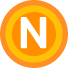
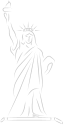
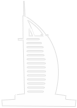
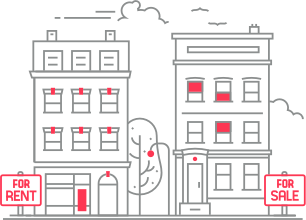
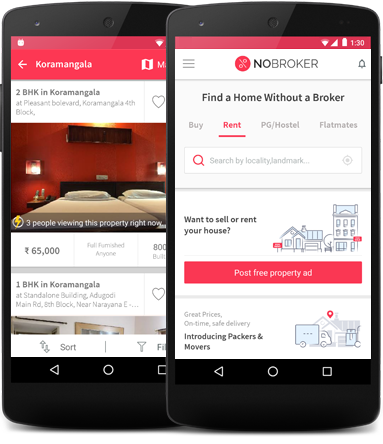
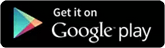
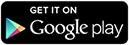

In [136]:
print(soup.prettify())

In [160]:
Location= soup.find_all('a',class_="nb__3CnI6")
Location


[<a class="nb__3CnI6" href="/property/buy/3-bhk-apartment-for-sale-in-mallathahalli-bangalore/8a9f928279c88dbc0179c8ddbb5a37d2/detail" itemprop="url" target="_blank" title="3 BHK Flat  For Sale  In Mallathahalli"><h2 class="heading-6 font-semi-bold nb__1AShY"><span itemprop="name">3 BHK Flat  For Sale  In Mallathahalli</span> <svg aria-hidden="true" class="jss1" focusable="false" role="presentation" viewbox="0 0 24 24"><path d="M0 0h24v24H0z" fill="none"></path><path d="M19 19H5V5h7V3H5c-1.11 0-2 .9-2 2v14c0 1.1.89 2 2 2h14c1.1 0 2-.9 2-2v-7h-2v7zM14 3v2h3.59l-9.83 9.83 1.41 1.41L19 6.41V10h2V3h-7z"></path></svg></h2></a>,
 <a class="nb__3CnI6" href="/property/buy/3-bhk-apartment-for-sale-in-mallathahalli-bangalore/8a9fb78378c5243c0178c5838ea91e7f/detail" itemprop="url" target="_blank" title="3 BHK Flat  For Sale  In Excellence Blossom In Mallathahalli"><h2 class="heading-6 font-semi-bold nb__1AShY"><span itemprop="name">3 BHK Apartment  For Sale  In Excellence Blossom In Mallathahalli

In [161]:
Location_list=[]
for i in Location:
    Location_list.append(i.text.strip())
Location_list

['3 BHK Flat  For Sale  In Mallathahalli',
 '3 BHK Apartment  For Sale  In Excellence Blossom In Mallathahalli',
 '2 BHK Flat  For Sale  In Excellence Blossom In Mallathahalli',
 '2 BHK In Independent House  For Sale  In Mallathahalli',
 '4+ BHK In Independent House  For Sale  In Mallathahalli',
 '4 BHK Flat  For Sale  In Naagarabhaavi',
 '3 BHK In Independent House  For Sale  In Mallathahalli',
 '2 BHK Apartment  For Sale  In Ds-max Sanvil In Mallathahalli',
 '4+ BHK In Independent House  For Sale  In Mallathahalli',
 '2 BHK Apartment  For Sale  In Ds-max Sanvil In Mallathahalli']

In [166]:
Area= soup.find_all('div',class_="nb__2CMjv")
Area

Area
Area_list=[]
for i in Area:
    Area_list.append(i.text.strip())
Area_list

['Standalone Building,  Kanyakumari High Schoo MV Layout  9TH BLOCK Bangalore 560056',
 'Excellence Blossom\xa0 NGEF Layout Near Narayana etechno school And Sri Varsiddi Vinayak Temple',
 'NGEF Layout,Near Narayana etechno school And Sri Varsiddi Vinayak Temple',
 'Independent House, Kengeri Main Rd near Sri Raja Rajeshwari Theatre',
 'Independent House,  BDA 9th Block Kengunte Near Kanyakumari High School and Rajiv Gandhi Memorial Polytechnic College',
 'Standalone Building,  10th Main Rd ITI Layout Near EuroKids Preschool Mallathahalli',
 'Independent House, Vishweshwaraiah Layout, Near Aditya Royal Apartment',
 'Ds-Max Sanvil\xa0 DS-MAX SANVIL, NGEF Layout, Mallathahalli, Bengaluru, Karnataka 560056, India',
 'Independent House, NGEF Layout, Near DS Max Sanvil',
 'Ds-Max Sanvil\xa0 DS-MAX SANVIL, NGEF Layout, Mallathahalli, Bengaluru, Karnataka 560056, India']

In [171]:
Area_1= soup.find_all('div',class_="font-semi-bold heading-6")
Area_1


Area_1_list=[]
for i in Area_1:
    Area_1_list.append(i.text.strip())
Area_1_list

['1,800 sqft',
 '₹63,045/Month',
 '₹1.1 Crores',
 '1,156 sqft',
 '₹37,254/Month',
 '₹65 Lacs',
 '1,200 sqft',
 '₹34,388/Month',
 '₹60 Lacs',
 '450 sqft',
 '₹29,230/Month',
 '₹51 Lacs',
 '2,850 sqft',
 '₹1 Lacs/Month',
 '₹1.75 Crores',
 '4,800 sqft',
 '₹1.6 Lacs/Month',
 '₹2.8 Crores',
 '2,400 sqft',
 '₹68,777/Month',
 '₹1.2 Crores',
 '1,200 sqft',
 '₹27,510/Month',
 '₹48 Lacs',
 '3,500 sqft',
 '₹97,434/Month',
 '₹1.7 Crores',
 '1,250 sqft',
 '₹29,803/Month',
 '₹52 Lacs']

In [179]:
emi=[]
#Points=[]
for i in range(0,len(Area_1_list)-1,3):
    emi.append(Area_1_list[i+1])
    #points.append(Matches[i+1])  # other teams points
emi

#Area=Matches_1[:10]
#Matches_1

['₹63,045/Month',
 '₹37,254/Month',
 '₹34,388/Month',
 '₹29,230/Month',
 '₹1 Lacs/Month',
 '₹1.6 Lacs/Month',
 '₹68,777/Month',
 '₹27,510/Month',
 '₹97,434/Month',
 '₹29,803/Month']

In [183]:
Area=[]
#Points=[]
for i in range(0,len(Area_1_list)-1,3):
    Area.append(Area_1_list[i])
    #points.append(Matches[i+1])  # other teams points
Area


['1,800 sqft',
 '1,156 sqft',
 '1,200 sqft',
 '450 sqft',
 '2,850 sqft',
 '4,800 sqft',
 '2,400 sqft',
 '1,200 sqft',
 '3,500 sqft',
 '1,250 sqft']

In [181]:
Price=[]
#Points=[]
for i in range(0,len(Area_1_list)-1,3):
    Price.append(Area_1_list[i+2])
    #points.append(Matches[i+1])  # other teams points
Price

['₹1.1 Crores',
 '₹65 Lacs',
 '₹60 Lacs',
 '₹51 Lacs',
 '₹1.75 Crores',
 '₹2.8 Crores',
 '₹1.2 Crores',
 '₹48 Lacs',
 '₹1.7 Crores',
 '₹52 Lacs']

In [184]:
import pandas as pd
Real_State=pd.DataFrame({})
Real_State['Price']=Price
Real_State['Area']=Area
Real_State['emi'] =emi
Real_State['Area_list'] =Area_list
Real_State['Location_list'] =Location_list
Real_State

Price        Area              emi  \
0   ₹1.1 Crores  1,800 sqft    ₹63,045/Month   
1      ₹65 Lacs  1,156 sqft    ₹37,254/Month   
2      ₹60 Lacs  1,200 sqft    ₹34,388/Month   
3      ₹51 Lacs    450 sqft    ₹29,230/Month   
4  ₹1.75 Crores  2,850 sqft    ₹1 Lacs/Month   
5   ₹2.8 Crores  4,800 sqft  ₹1.6 Lacs/Month   
6   ₹1.2 Crores  2,400 sqft    ₹68,777/Month   
7      ₹48 Lacs  1,200 sqft    ₹27,510/Month   
8   ₹1.7 Crores  3,500 sqft    ₹97,434/Month   
9      ₹52 Lacs  1,250 sqft    ₹29,803/Month   

                                           Area_list  \
0  Standalone Building,  Kanyakumari High Schoo M...   
1  Excellence Blossom  NGEF Layout Near Narayana ...   
2  NGEF Layout,Near Narayana etechno school And S...   
3  Independent House, Kengeri Main Rd near Sri Ra...   
4  Independent House,  BDA 9th Block Kengunte Nea...   
5  Standalone Building,  10th Main Rd ITI Layout ...   
6  Independent House, Vishweshwaraiah Layout, Nea...   
7  Ds-Max Sanvil  DS-MAX SANVIL, NGEF Layout, Mal...   
8  Independent House, NGEF Layout, Near DS Max Sa...   
9  Ds-Max Sanvil  DS-MAX SANVIL, NGEF Layout, Mal...   

                                       Location_list  
0             3 BHK Flat  For Sale  In Mallathahalli  
1  3 BHK Apartment  For Sale  In Excellence Bloss...  
2  2 BHK Flat  For Sale  In Excellence Blossom In...  
3  2 BHK In Independent House  For Sale  In Malla...  
4  4+ BHK In Independent House  For Sale  In Mall...  
5             4 BHK Flat  For Sale  In Naagarabhaavi  
6  3 BHK In Independent House  For Sale  In Malla...  
7  2 BHK Apartment  For Sale  In Ds-max Sanvil In...  
8  4+ BHK In Independent House  For Sale  In Mall...  
9  2 BHK Apartment  For Sale  In Ds-max Sanvil In...